## Set environment 

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')

import rubetools
from rubetools import PascalVOC, Yolo, MSCOCO

## Load data

In [5]:
pascal_img_dir = os.path.join('data/images')
pascal_ann_dir = os.path.join('data/pascalvoc')
pascalvoc = PascalVOC(ann_path=pascal_ann_dir, img_path=pascal_img_dir)
pascalvoc

100%|██████████| 10/10 [00:00<00:00, 299.17it/s]
2021-04-15 10:20:19 - Loaded 10 PascalVOC annotations.


<PascalVOC, annotations: 10, labels: 3>

## Save data

To save changes  in annotations call **save** method:

In [ ]:
pascalvoc.save()

#### After loading annotations to memory you can do the following:
1. convert to any implemented format
2. rename classes
3. slice images and corresponding annotations
4. dataset split (train/test)
5. object distribution statistics
6. image and annotation name matching

## 1. Convert annotations

#### to **Yolo:**

Converted to **Yolo** annotations will be saved in **save_path** directory in a separate folder. The images will not be saved as **is_save_images** equals **False**

In [6]:
pascalvoc.convert_to(Yolo, save_path='output/yolo', is_save_images=False)

100%|██████████| 10/10 [00:00<00:00, 1341.40it/s]
2021-04-15 10:20:29 - Yolo. Saved 10 annotations.
2021-04-15 10:20:29 - Saved in Yolo.


#### to **MSCOCO:**

You can save loaded annotation objects in any available formats, for instance, let's save annotations in **MSCOCO** and save images as well. 

In [7]:
pascalvoc.convert_to(MSCOCO, save_path='output/mscoco', is_save_images=True)

10it [00:00, 5066.81it/s]
2021-04-15 10:20:31 - MSCOCO. Saved 10 annotations.
2021-04-15 10:20:31 - MSCOCO. Saved 10 images.
2021-04-15 10:20:31 - Saved in MSCOCO.


## 2. Rename classes

If you want to unify class names, you can rename labels via **rename_classes** method. Set dictionary for renaming: key - initial class name, value - new class name.

In [8]:
help(pascalvoc.rename_classes)

Help on method rename_classes in module rubetools.formats.base:

rename_classes(rename_dict: Dict[str, str]) method of rubetools.formats.pascalvoc.PascalVOC instance
    Rename class labels for every annotation
    :param rename_dict: class name renaming dictionary. key: old class name, value: new class name
    :return:



Statistics before renaming:

In [9]:
pascalvoc.labels_stat

{'hbox': {'small_vehicle': 217, 'large_vehicle': 20},
 'keypoints': {},
 'polygon': {}}

In [10]:
pascalvoc.rename_classes(rename_dict={'small_vehicle': 'car', 'large_vehicle': 'car'})

2021-04-15 10:20:39 - Renamed 237 objects in 9 annotations.


All objects with **small_vehicle** and **large_vehicle** were renamed to **car** class

Statistics after renaming:

In [11]:
pascalvoc.labels_stat

{'hbox': {'car': 237}, 'keypoints': {}, 'polygon': {}}

Let's save all changes in annotations in separate folder:

In [12]:
pascalvoc.save(save_dir='output/pascalvoc')

100%|██████████| 10/10 [00:00<00:00, 1415.56it/s]
2021-04-15 10:20:48 - PascalVOC. Saved 10 annotations.
2021-04-15 10:20:48 - Saved in PascalVOC.


## 3. Image slicing
Let's slice images into fragments of given size and with given step and save corresponding annotations:

In [13]:
pascalvoc.slice_images(img_save_dir='output/pascalvoc', shape=(416, 416))

100%|██████████| 10/10 [00:00<00:00, 15.58it/s]
2021-04-15 10:20:51 - Split 183 fragments from 10 images.


In [14]:
pascalvoc.save(save_dir='output/pascalvoc')

100%|██████████| 183/183 [00:00<00:00, 6626.87it/s]
2021-04-15 10:20:52 - PascalVOC. Saved 183 annotations.
2021-04-15 10:20:52 - Saved in PascalVOC.


## 4. Dataset split (train/test)

Let's split our dataset into train and test. After that, we can work with them separately.

In [15]:
pascal_train, pascal_test = pascalvoc.split(ratio=(0.8, 0.2))
pascal_train.save(save_dir='output/pascalvoc/train')
pascal_test.save(save_dir='output/pascalvoc/test')

100%|██████████| 146/146 [00:00<00:00, 4476.48it/s]
2021-04-15 10:20:54 - PascalVOC. Saved 146 annotations.
2021-04-15 10:20:54 - Saved in PascalVOC.
100%|██████████| 37/37 [00:00<00:00, 6368.83it/s]
2021-04-15 10:20:54 - PascalVOC. Saved 37 annotations.
2021-04-15 10:20:54 - Saved in PascalVOC.


## 5. Statistics

To conduct EDA you can use implemented methods to get statistics of key characteristics

#### Pandas - annotation object statistics:

In [16]:
pascalvoc.eda.info_df.head()

,filename,img_width,img_height,box_width,box_height,label,type
0,DJI-00760-00021_13.jpg,416,416,42.0,30.0,car,Object
1,DJI-00760-00021_13.jpg,416,416,75.0,32.0,car,Object
2,DJI-00760-00021_13.jpg,416,416,74.0,31.0,car,Object
3,DJI-00760-00021_13.jpg,416,416,53.0,38.0,car,Object
4,DJI-00760-00023_13.jpg,416,416,71.0,32.0,car,Object


#### Class label bar graph:


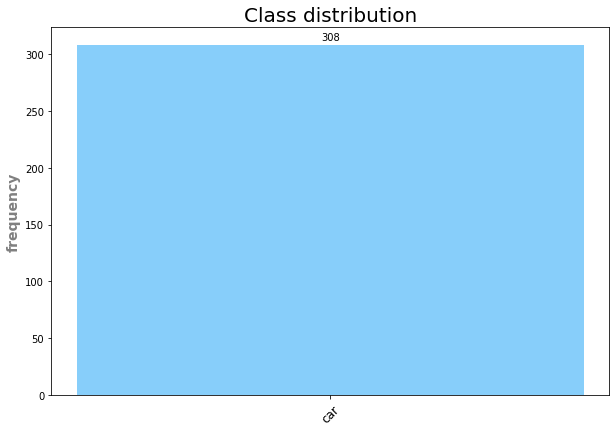

In [17]:
pascalvoc.eda.classes_histogram()

#### Image size distribution:

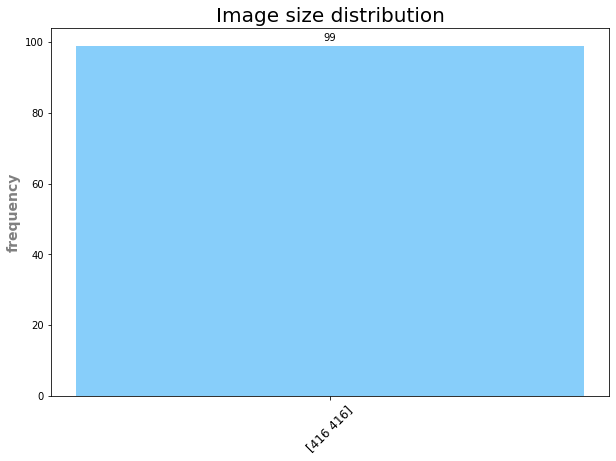

In [18]:
pascalvoc.eda.image_size_histogram()

#### Object size distribution in relative values:


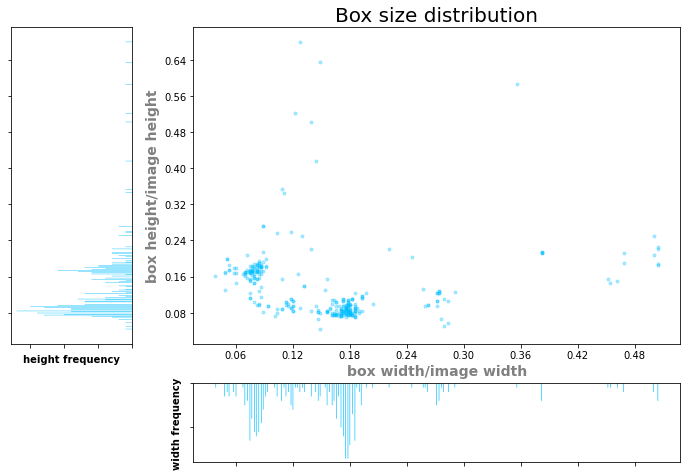

In [19]:
pascalvoc.eda.objects_frequency_scatter()

#### Channel-wise brightness distribution

100%|██████████| 183/183 [00:00<00:00, 439.32it/s]


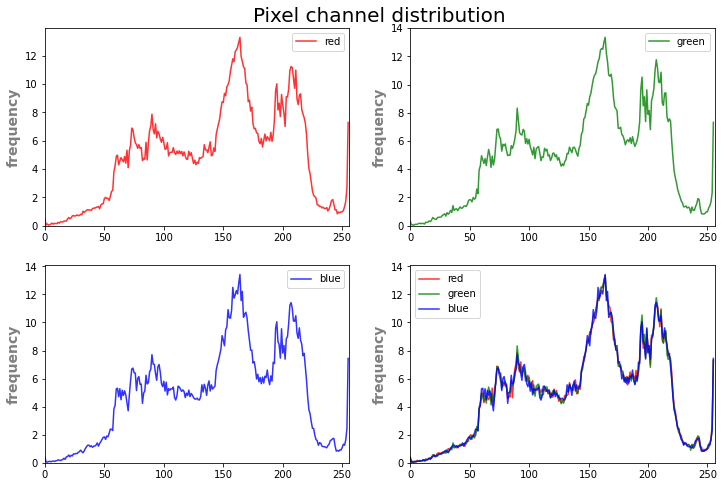

In [20]:
pascalvoc.eda.image_color_histogram()